# Ungraded Lab: First Autoencoder

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/TensorFlow-Advanced_Techniques_Specialization/blob/master/Generative_Deep_Learning_with_TensorFlow/Week2/Labs/C4_W2_Lab_1_FirstAutoEncoder.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

In this lab, you will build your first simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

## Imports

In [1]:
from keras import Sequential, layers, optimizers, Input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

2024-09-12 13:27:17.086276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-12 13:27:17.098377: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-12 13:27:17.101992: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-12 13:27:17.110698: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare and preview the dataset

You will first create a synthetic dataset to act as input to the autoencoder. You can do that with the function below.

In [2]:
def generate_data(m):
    '''Plots m random points on a 3D plane'''
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles) / 2 + 0.1 * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

    return data

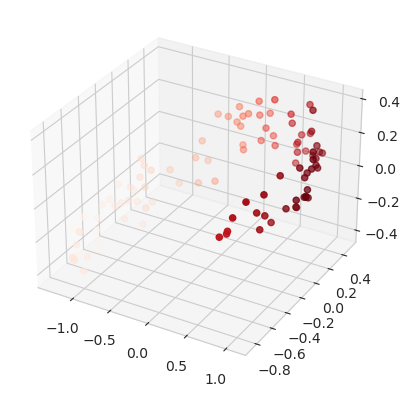

In [3]:
# Use the function above to generate data points
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# Preview the data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=X_train[:, 0], cmap='Reds');

## Build the Model

Now you will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder then expand in the decoder.

In [4]:
encoder = Sequential([Input(shape=[3]), layers.Dense(2)])
decoder = Sequential([Input(shape=[2]), layers.Dense(3)])
autoencoder = Sequential([encoder, decoder])

2024-09-12 13:27:19.777225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1944 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


## Compile the Model

You can then setup the model for training.

In [5]:
autoencoder.compile(loss="mse", optimizer=optimizers.SGD(learning_rate=0.1))

## Train the Model

You will configure the training to also use the input data as your target output. In our example, that will be `X_train`.

In [6]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200


I0000 00:00:1726169240.508472   58469 service.cc:146] XLA service 0x70b0d40061e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726169240.508496   58469 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-09-12 13:27:20.527205: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.4270
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2118 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1342 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0864 
Epoch 5/200


I0000 00:00:1726169240.909655   58469 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0600 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0446 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0343 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0202 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0165 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 
Epoch 16/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 
Epoch 17/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 
Epoch 18/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.0145
Epoch 19/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0138 
Epoch 20/200
4/4 ━━━━━━━━━

## Plot the encoder output

As mentioned, you can use the encoder to compress the input to two dimensions.

In [7]:
# Encode the data
codings = encoder.predict(X_train)

# See a sample input-encoder output pair
print(f'Input point: {X_train[0]}')
print(f'Encoded point: {codings[0]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Input point: [ 0.56890173 -0.5077036  -0.04993889]
Encoded point: [ 0.07251185 -0.67209405]


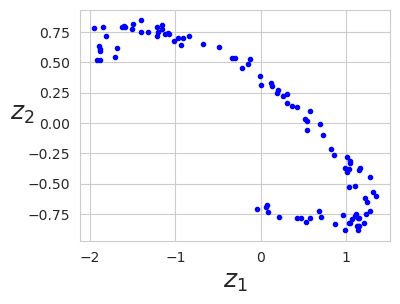

In [8]:
# Plot all encoder outputs
fig = plt.figure(figsize=(4, 3))
plt.plot(codings[:, 0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Plot the Decoder output

The decoder then tries to reconstruct the original input. See the outputs below. You will see that although not perfect, it still follows the general shape of the original input.

In [9]:
# Decode the encoder output
decodings = decoder.predict(codings)

# See a sample output for a single point
print(f'Input point: {X_train[0]}')
print(f'Encoded point: {codings[0]}')
print(f'Decoded point: {decodings[0]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Input point: [ 0.56890173 -0.5077036  -0.04993889]
Encoded point: [ 0.07251185 -0.67209405]
Decoded point: [ 0.55565464 -0.5179401  -0.08083275]


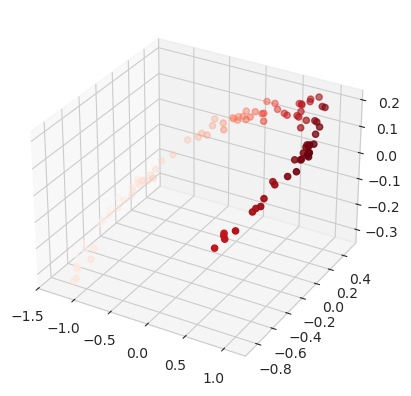

In [10]:
# Plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

That's it for this simple demonstration of the autoencoder!